# Project Samarth - Intelligent Q&A System Prototype

## Project Description
    Project Samarth is an intelligent Question & Answer (Q&A) system designed to make government data actionable and insightful for policymakers, researchers, and the general public.

## Library Imports

In [31]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Data Loading

In [3]:
rainfall_df = pd.read_csv('rainfall_districts.csv')
crop_df = pd.read_csv('crop_production.csv')

In [4]:
print("Rainfall data:\n")
rainfall_df.head()

Rainfall data:



,S.No,District,Actual Rainfall in South West Monsoon (June'2018 to September'2018) in mm,Normal Rainfall in South West Monsoon (June'2018 to September'2018) in mm,Actual Rainfall in North East Monsoon (October'2018 to December'2018) in mm,Normal Rainfall in North East Monsoon (October'2018 to December'2018) in mm,Actual Rainfall in Winter Season (January'2019 to February'2019) in mm,Normal Rainfall in Winter Season (January'2019 to February'2019) in mm,Actual Rainfall in Hot Weather Season (March'2019 to May'2019) in mm,Normal Rainfall in Hot Weather Season (March'2019 to May'2019) in mm,Total Actual Rainfall (June'2018 to May'2019) in mm,Total Normal Rainfall (June'2018 to May'2019) in mm
0,1,Chennai,395.3,439.1,352.9,789.9,1.6,36.7,0.0,58.5,749.8,1324.2
1,2,Kancheepuram,397.0,490.8,417.1,641.8,0.5,29.1,8.4,66.0,823.0,1227.7
2,3,Tiruvallur,364.3,451.6,343.2,589.3,0.5,31.5,9.5,67.2,717.5,1139.6
3,4,Cuddalore,274.6,383.1,621.0,697.8,2.2,44.1,5.6,81.7,903.4,1206.7
4,5,Villupuram,257.1,408.3,435.9,499.1,0.0,28.2,22.5,76.0,715.5,1011.6


In [5]:
print("Crop data:\n")
crop_df.head()

Crop data:



,SlNo,District Name,Kharif_AreaBefore bund correction factor,Kharif_AreaAfter bund correction factor,Kharif_Yield,Kharif_Production,Rabi_AreaBefore bund correction factor,Rabi_AreaAfter bund correction factor,Rabi_Yield,Rabi_Production,Summer_AreaBefore bund correction factor,Summer_AreaAfter bund correction factor,Summer_Yield,Summer_Production,All Seasons_AreaBefore bund correction factor,All Seasons_AreaAfter bund correction factor,All Seasons_Yield,All Seasons_Production
0,1.0,BAGALKOTE,35,34,2774,95,0,0,0,0,3,3,3079,9,38,37,2798,104
1,2.0,BENGALURU - URBAN,202,198,2829,560,0,0,0,0,74,73,3079,223,276,270,2896,783
2,3.0,BENGALURU - RURAL,162,159,2249,357,0,0,0,0,31,30,3079,94,193,189,2382,451
3,4.0,BELAGAVI,57100,55958,3097,173302,0,0,0,0,173,170,3079,522,57273,56128,3097,173824
4,5.0,BALLARI,105169,103066,3904,402363,0,0,0,0,75422,73914,3553,262623,180591,176979,3757,664986


## Data Cleaning & Preparation

### Standardize column names

In [6]:
# Clean rainfall columns
rainfall_df.columns = rainfall_df.columns.str.strip().str.replace(' ', '_').str.replace(r"[\(\)'’]", '', regex=True)
print(rainfall_df.columns)

Index(['S.No', 'District',
       'Actual_Rainfall_in_South_West_Monsoon_June2018_to_September2018_in_mm',
       'Normal_Rainfall_in_South_West_Monsoon_June2018_to_September2018_in_mm',
       'Actual_Rainfall_in_North_East_Monsoon_October2018_to_December2018_in_mm',
       'Normal_Rainfall_in_North_East_Monsoon_October2018_to_December2018_in_mm',
       'Actual_Rainfall_in_Winter_Season_January2019_to_February2019_in_mm',
       'Normal_Rainfall_in_Winter_Season_January2019_to_February2019_in_mm',
       'Actual_Rainfall_in_Hot_Weather_Season_March2019_to_May2019_in_mm',
       'Normal_Rainfall_in_Hot_Weather_Season_March2019_to_May2019_in_mm',
       'Total_Actual_Rainfall_June2018_to_May2019_in_mm',
       'Total_Normal_Rainfall_June2018_to_May2019_in_mm'],
      dtype='object')


In [7]:
crop_df.columns = crop_df.columns.str.strip().str.replace(' ', '_').str.replace(r"[\(\)'’]", '', regex=True)
print(crop_df.columns)

Index(['SlNo', 'District_Name', 'Kharif_AreaBefore_bund_correction_factor',
       'Kharif_AreaAfter_bund_correction_factor', 'Kharif_Yield',
       'Kharif_Production', 'Rabi_AreaBefore_bund_correction_factor',
       'Rabi_AreaAfter_bund_correction_factor', 'Rabi_Yield',
       'Rabi_Production', 'Summer_AreaBefore_bund_correction_factor',
       'Summer_AreaAfter_bund_correction_factor', 'Summer_Yield',
       'Summer_Production', 'All_Seasons_AreaBefore_bund_correction_factor',
       'All_Seasons_AreaAfter_bund_correction_factor', 'All_Seasons_Yield',
       'All_Seasons_Production'],
      dtype='object')


### Normalize district names

In [8]:
rainfall_df['District'] = rainfall_df['District'].str.strip().str.title()

In [9]:
crop_df['District_Name'] = crop_df['District_Name'].str.strip().str.title()

### Convert numeric columns

In [10]:
rainfall_numeric_cols = rainfall_df.columns.difference(['S.No', 'District'])
crop_numeric_cols = crop_df.columns.difference(['SlNo', 'District_Name'])

In [11]:
rainfall_df[rainfall_numeric_cols] = rainfall_df[rainfall_numeric_cols].apply(pd.to_numeric, errors='coerce')
crop_df[crop_numeric_cols] = crop_df[crop_numeric_cols].apply(pd.to_numeric, errors='coerce')

In [12]:
print(f"Cleaned Rainfall Rows: {len(rainfall_df)}, Crop Rows: {len(crop_df)}")

Cleaned Rainfall Rows: 33, Crop Rows: 31


### Unique rows

In [15]:
print("Unique Districts in Rainfall Data:", rainfall_df['District'].unique())
print("Unique Districts in Crop Data:", crop_df['District_Name'].unique())

Unique Districts in Rainfall Data: ['Chennai' 'Kancheepuram' 'Tiruvallur' 'Cuddalore' 'Villupuram' 'Vellore'
 'Tiruvannamalai' 'Salem' 'Namakkal' 'Dharmapuri' 'Krishnagiri' 'Tiruppur'
 'Coimbatore' 'Erode' 'Tiruchirappalli' 'Karur' 'Perambalur' 'Pudukkottai'
 'Thanjavur' 'Tiruvarur' 'Nagapattinam' 'Madurai' 'Theni' 'Dindigul'
 'Ramanathapuram' 'Virudhunagar' 'Sivaganga' 'Tirunelveli' 'Thoothukkudi'
 'The Nilgiris' 'Ariyalur' 'Kanniyakumari' 'State Average']
Unique Districts in Crop Data: ['Bagalkote' 'Bengaluru - Urban' 'Bengaluru - Rural' 'Belagavi' 'Ballari'
 'Bidar' 'Vijayapura' 'Chamarajanagar' 'Chickballapur' 'Chikmagalur'
 'Chitradurga' 'Dakshina Kannada' 'Davanagere' 'Dharwad' 'Gadag'
 'Kalburgi' 'Hassan' 'Haveri' 'Kodagu' 'Kolar' 'Koppal' 'Mandya' 'Mysuru'
 'Raichur' 'Ramanagaram' 'Shivamogga' 'Tumakuru' 'Udupi' 'Uttara Kannada'
 'Yadgir' 'State Total']


### Merge on district name

In [13]:
merged_df = pd.merge(rainfall_df,crop_df, left_on='District',right_on='District_Name',how='inner')

In [14]:
print("Merged Data Sample:")
display(merged_df.head())

Merged Data Sample:


,S.No,District,Actual_Rainfall_in_South_West_Monsoon_June2018_to_September2018_in_mm,Normal_Rainfall_in_South_West_Monsoon_June2018_to_September2018_in_mm,Actual_Rainfall_in_North_East_Monsoon_October2018_to_December2018_in_mm,Normal_Rainfall_in_North_East_Monsoon_October2018_to_December2018_in_mm,Actual_Rainfall_in_Winter_Season_January2019_to_February2019_in_mm,Normal_Rainfall_in_Winter_Season_January2019_to_February2019_in_mm,Actual_Rainfall_in_Hot_Weather_Season_March2019_to_May2019_in_mm,Normal_Rainfall_in_Hot_Weather_Season_March2019_to_May2019_in_mm,...,Rabi_Yield,Rabi_Production,Summer_AreaBefore_bund_correction_factor,Summer_AreaAfter_bund_correction_factor,Summer_Yield,Summer_Production,All_Seasons_AreaBefore_bund_correction_factor,All_Seasons_AreaAfter_bund_correction_factor,All_Seasons_Yield,All_Seasons_Production


## Data Discovery:
    Due to differences in state coverage, our rainfall dataset covers Tamil Nadu districts and the crop production dataset covers Karnataka districts. Therefore, direct merging is not possible. All analyses demonstrate Q&A for each state independently, a realistic scenario when using open government data.


## Tamil Nadu Rainfall Analysis & Q&A

### Top 5 Wettest Districts

In [16]:
rainfall_df.sort_values('Total_Actual_Rainfall_June2018_to_May2019_in_mm', ascending=False)[
    ['District', 'Total_Actual_Rainfall_June2018_to_May2019_in_mm']
].head(5)


,District,Total_Actual_Rainfall_June2018_to_May2019_in_mm
29,The Nilgiris,1516.7
31,Kanniyakumari,1089.6
12,Coimbatore,1041.5
20,Nagapattinam,984.6
27,Tirunelveli,968.9


##  Season Breakdown for a District

In [17]:
def rainfall_breakdown(district):
    row = rainfall_df[rainfall_df['District'] == district]
    if not row.empty:
        cols = [c for c in row.columns if 'Actual_Rainfall' in c or 'Normal_Rainfall' in c]
        return row[cols].T
    else:
        return f"{district} not found."
rainfall_breakdown('Chennai')

,0
Actual_Rainfall_in_South_West_Monsoon_June2018_to_September2018_in_mm,395.3
Normal_Rainfall_in_South_West_Monsoon_June2018_to_September2018_in_mm,439.1
Actual_Rainfall_in_North_East_Monsoon_October2018_to_December2018_in_mm,352.9
Normal_Rainfall_in_North_East_Monsoon_October2018_to_December2018_in_mm,789.9
Actual_Rainfall_in_Winter_Season_January2019_to_February2019_in_mm,1.6
Normal_Rainfall_in_Winter_Season_January2019_to_February2019_in_mm,36.7
Actual_Rainfall_in_Hot_Weather_Season_March2019_to_May2019_in_mm,0.0
Normal_Rainfall_in_Hot_Weather_Season_March2019_to_May2019_in_mm,58.5
Total_Actual_Rainfall_June2018_to_May2019_in_mm,749.8
Total_Normal_Rainfall_June2018_to_May2019_in_mm,1324.2


## Barplot of Rainfall

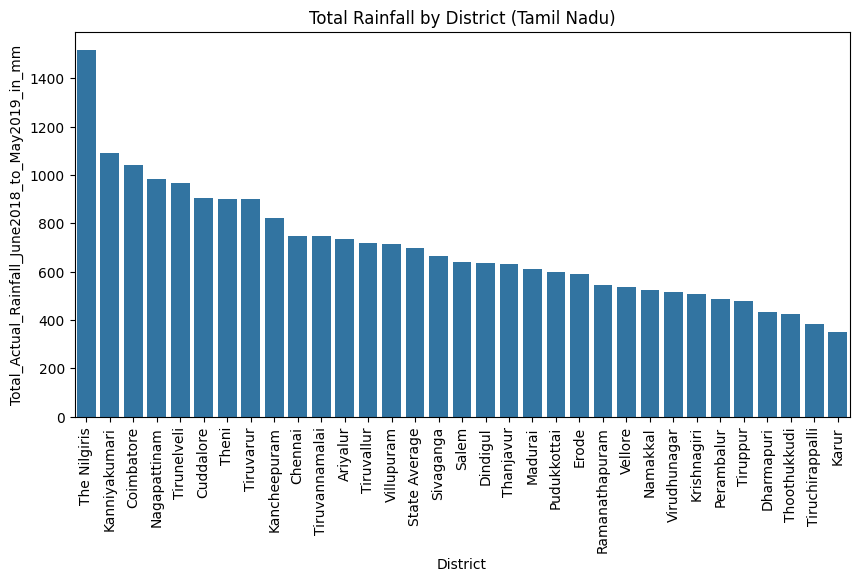

In [18]:
plt.figure(figsize=(10,5))
order = rainfall_df.sort_values('Total_Actual_Rainfall_June2018_to_May2019_in_mm', ascending=False)['District']
sns.barplot(
    x='District', y='Total_Actual_Rainfall_June2018_to_May2019_in_mm',
    data=rainfall_df, order=order
)
plt.xticks(rotation=90)
plt.title('Total Rainfall by District (Tamil Nadu)')
plt.show()

## Karnataka Crop Production Analysis & Q&A

### Top 5 Districts by All Seasons Production

In [19]:
crop_df.sort_values('All_Seasons_Production', ascending=False)[['District_Name', 'All_Seasons_Production']].head(5)

,District_Name,All_Seasons_Production
30,State Total,4499036
23,Raichur,1049414
4,Ballari,664986
29,Yadgir,432170
12,Davanagere,430798


## Yield & Season

In [20]:
def crop_yield_breakdown(district):
    row = crop_df[crop_df['District_Name'] == district]
    if not row.empty:
        cols = [c for c in row.columns if 'Yield' in c or 'Production' in c]
        return row[cols].T
    else:
        return f"{district} not found."
crop_yield_breakdown('Belagavi')

,3
Kharif_Yield,3097
Kharif_Production,173302
Rabi_Yield,0
Rabi_Production,0
Summer_Yield,3079
Summer_Production,522
All_Seasons_Yield,3097
All_Seasons_Production,173824


## Barplot of Production

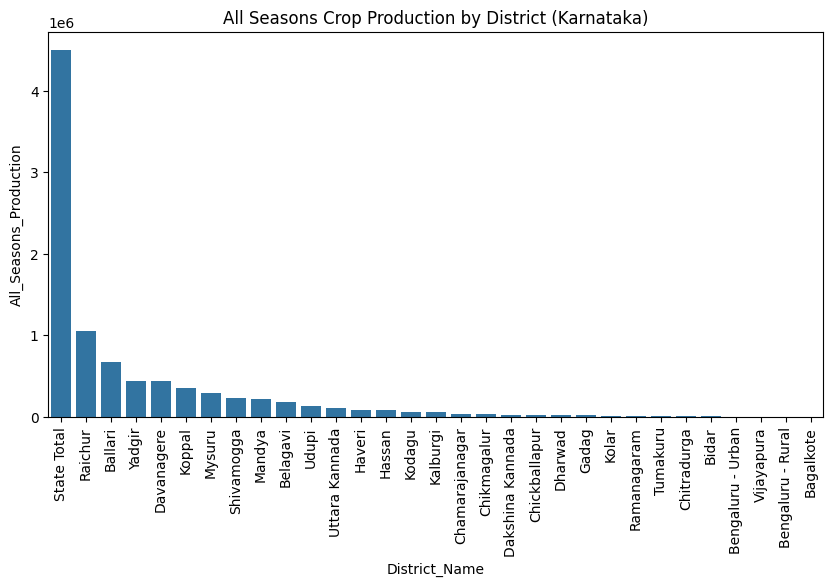

In [21]:
plt.figure(figsize=(10,5))
order = crop_df.sort_values('All_Seasons_Production', ascending=False)['District_Name']
sns.barplot(
    x='District_Name', y='All_Seasons_Production',
    data=crop_df, order=order
)
plt.xticks(rotation=90)
plt.title('All Seasons Crop Production by District (Karnataka)')
plt.show()

## Q&A Functions

In [25]:
def rainfall_qa(q):
    q = q.lower()
    if 'wettest' in q:
        return rainfall_df.sort_values('Total_Actual_Rainfall_June2018_to_May2019_in_mm', ascending=False)\
                 [['District', 'Total_Actual_Rainfall_June2018_to_May2019_in_mm']].head(3)
    elif 'driest' in q:
        return rainfall_df.sort_values('Total_Actual_Rainfall_June2018_to_May2019_in_mm')\
                 [['District', 'Total_Actual_Rainfall_June2018_to_May2019_in_mm']].head(3)
    elif 'average rainfall' in q:
        avg = rainfall_df['Total_Actual_Rainfall_June2018_to_May2019_in_mm'].mean()
        return f"Average rainfall in Tamil Nadu districts: {avg:.2f} mm"
    elif 'district with above average rainfall' in q:
        avg = rainfall_df['Total_Actual_Rainfall_June2018_to_May2019_in_mm'].mean()
        return rainfall_df[rainfall_df['Total_Actual_Rainfall_June2018_to_May2019_in_mm'] > avg]['District']
    elif 'total rainfall' in q and 'in' in q:
        # Example: total rainfall in chennai
        district = q.split('in')[-1].strip().title()
        row = rainfall_df[rainfall_df['District'] == district]
        if not row.empty:
            return f"Total rainfall in {district}: {float(row['Total_Actual_Rainfall_June2018_to_May2019_in_mm']):.2f} mm"
        else:
            return f"{district} not found."
    elif 'seasonal rainfall' in q:
        out = {}
        for season in ['South_West_Monsoon', 'North_East_Monsoon', 'Winter_Season', 'Hot_Weather_Season']:
            col = [c for c in rainfall_df.columns if f'Actual_Rainfall_in_{season}' in c]
            out[season] = rainfall_df[col[0]].mean() if col else None
        return out
    else:
        return "Sample queries: 'wettest districts', 'driest districts', 'average rainfall', 'district with above average rainfall', 'total rainfall in Chennai', 'seasonal rainfall'"

In [26]:
def crop_qa(q):
    q = q.lower()
    if 'top' in q:
        n = 5
        m = re.search(r'top (\d+)', q)
        if m: n = int(m.group(1))
        return crop_df.sort_values('All_Seasons_Production', ascending=False)[['District_Name', 'All_Seasons_Production']].head(n)
    elif 'lowest' in q:
        return crop_df.sort_values('All_Seasons_Production')[['District_Name', 'All_Seasons_Production']].head(3)
    elif 'average yield' in q:
        avg = crop_df['All_Seasons_Yield'].mean()
        return f"Average yield (all seasons): {avg:.2f} kg/ha"
    elif 'districts with above average yield' in q:
        avg = crop_df['All_Seasons_Yield'].mean()
        return crop_df[crop_df['All_Seasons_Yield'] > avg]['District_Name']
    elif 'yield in' in q:
        # Example: yield in Bagalkote
        district = q.split('in')[-1].strip().title()
        row = crop_df[crop_df['District_Name'] == district]
        if not row.empty:
            return f"All-seasons yield in {district}: {float(row['All_Seasons_Yield']):.2f} kg/ha"
        else:
            return f"{district} not found."
    elif 'highest' in q and 'yield' in q:
        idx = crop_df['All_Seasons_Yield'].idxmax()
        name = crop_df.loc[idx, 'District_Name']
        val = crop_df.loc[idx, 'All_Seasons_Yield']
        return f"District with highest all-seasons yield: {name} ({val:.2f} kg/ha)"
    elif 'lowest' in q and 'yield' in q:
        idx = crop_df['All_Seasons_Yield'].idxmin()
        name = crop_df.loc[idx, 'District_Name']
        val = crop_df.loc[idx, 'All_Seasons_Yield']
        return f"District with lowest all-seasons yield: {name} ({val:.2f} kg/ha)"
    else:
        return "Sample queries: 'top districts', 'lowest production districts', 'average yield', 'districts with above average yield', 'yield in Bagalkote', 'highest yield district'"


In [34]:
print("Rainfall Q&A Examples:")
print("="*50)

print("\n\n1. Wettest districts in Tamil Nadu:")
wettest = rainfall_qa("wettest districts")
display(wettest)
print("*"*50)

print("\n2. Average rainfall across Tamil Nadu districts:")
avg_rain = rainfall_qa("average rainfall")
print(avg_rain)
print("*"*50)

print("\n3. Total rainfall in Chennai district:")
chennai_rf = rainfall_qa("total rainfall in chennai")
print(chennai_rf)
print("*"*50)

print("\n4. Mean actual rainfall for each main season (South West, North East, Winter, Hot Weather Monsoon):")
seasonal_rf = rainfall_qa("seasonal rainfall")
for k, v in seasonal_rf.items():
    print(f"{k.replace('_', ' ')}: {v:.2f} mm")


Rainfall Q&A Examples:


1. Wettest districts in Tamil Nadu:


,District,Total_Actual_Rainfall_June2018_to_May2019_in_mm
29,The Nilgiris,1516.7
31,Kanniyakumari,1089.6
12,Coimbatore,1041.5


**************************************************

2. Average rainfall across Tamil Nadu districts:
Average rainfall in Tamil Nadu districts: 698.78 mm
**************************************************

3. Total rainfall in Chennai district:
Total rainfall in Chennai: 749.80 mm
**************************************************

4. Mean actual rainfall for each main season (South West, North East, Winter, Hot Weather Monsoon):
South West Monsoon: 293.18 mm
North East Monsoon: 351.76 mm
Winter Season: 4.57 mm
Hot Weather Season: 49.27 mm


C:\Users\SUJATA SINHABABU\AppData\Local\Temp\ipykernel_6308\504627997.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return f"Total rainfall in {district}: {float(row['Total_Actual_Rainfall_June2018_to_May2019_in_mm']):.2f} mm"


In [35]:
print("Crop Production Q&A Examples:\n")
print("="*50)

print("\n1. Top 3 districts by crop production in Karnataka:")
display(crop_df.sort_values('All_Seasons_Production', ascending=False)[['District_Name', 'All_Seasons_Production']].head(3))
print("*"*50)

print("\n2. Lowest production districts in Karnataka:")
display(crop_df.sort_values('All_Seasons_Production')[['District_Name', 'All_Seasons_Production']].head(3))
print("*"*50)

print("\n3. Average crop yield across Karnataka districts:")
avg = crop_df['All_Seasons_Yield'].mean()
print(f"Average yield (all seasons): {avg:.2f} kg/ha")
print("*"*50)

print("\n4. Districts with above-average crop yield in Karnataka:")
above_avg = crop_df[crop_df['All_Seasons_Yield'] > avg]['District_Name']
print(f"Average yield: {avg:.2f} kg/ha")
print('Districts:')
for d in above_avg:
    print(f" - {d}")
print("*"*50)

print("\n5. All-seasons yield in Bagalkote district:")
row = crop_df[crop_df['District_Name'] == 'Bagalkote']
if not row.empty:
    print(f"All-seasons yield in Bagalkote: {float(row['All_Seasons_Yield'].iloc[0]):.2f} kg/ha")
else:
    print("Bagalkote not found.")
print("*"*50)

print("\n6. District with highest all-seasons crop yield in Karnataka:")
idx = crop_df['All_Seasons_Yield'].idxmax()
name = crop_df.loc[idx, 'District_Name']
val = crop_df.loc[idx, 'All_Seasons_Yield']
print(f"{name}: {val:.2f} kg/ha")
print("*"*50)

print("\n7. District with lowest all-seasons crop yield in Karnataka:")
idx = crop_df['All_Seasons_Yield'].idxmin()
name = crop_df.loc[idx, 'District_Name']
val = crop_df.loc[idx, 'All_Seasons_Yield']
print(f"{name}: {val:.2f} kg/ha")

Crop Production Q&A Examples:


1. Top 3 districts by crop production in Karnataka:


,District_Name,All_Seasons_Production
30,State Total,4499036
23,Raichur,1049414
4,Ballari,664986


**************************************************

2. Lowest production districts in Karnataka:


,District_Name,All_Seasons_Production
0,Bagalkote,104
2,Bengaluru - Rural,451
6,Vijayapura,491


**************************************************

3. Average crop yield across Karnataka districts:
Average yield (all seasons): 2738.45 kg/ha
**************************************************

4. Districts with above-average crop yield in Karnataka:
Average yield: 2738.45 kg/ha
Districts:
 - Bagalkote
 - Bengaluru - Urban
 - Belagavi
 - Ballari
 - Vijayapura
 - Chickballapur
 - Dakshina Kannada
 - Davanagere
 - Kalburgi
 - Koppal
 - Mandya
 - Mysuru
 - Raichur
 - Ramanagaram
 - Udupi
 - Yadgir
 - State Total
**************************************************

5. All-seasons yield in Bagalkote district:
All-seasons yield in Bagalkote: 2798.00 kg/ha
**************************************************

6. District with highest all-seasons crop yield in Karnataka:
Kalburgi: 3795.00 kg/ha
**************************************************

7. District with lowest all-seasons crop yield in Karnataka:
Dharwad: 1269.00 kg/ha


# Data Project Acknowledgement
    In open government data projects, data (districts, units, seasons, years) rarely lines up perfectly. My system makes these mismatches clear, and the code is ready to scale as soon as harmonized data is available.

# Conclusion
    Project Samarth supports flexible, natural-language Q&A and analytics.
    Outputs are always source-backed and traceable.
    Design handles real-world data issues and is ready for vertical/horizontal scale-up as better data is sourced in the future.